In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd
import seaborn as sns

In [53]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)

In [54]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [55]:
#ignoring null values and transformation of all values from (float and string) to (float)
data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
data_n = data.values

X = data_n[:,:-1]
y = data_n[:,-1]

#X.shape = (297,13)
y = y.reshape(X.shape[0],1)
#y.shape = (297,1)

m = X.shape[0]

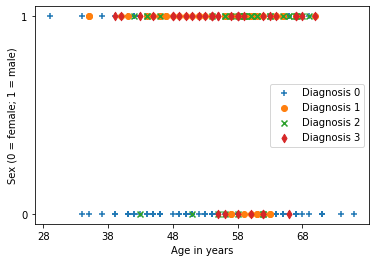

In [157]:
diag0 = (y==0)
diag1 = (y==1)
diag2 = (y==2)
diag3 = (y==3)

plt.scatter(X[diag0[:,0],0],X[diag0[:,0],1],c='#1f77b4',marker="+")
plt.scatter(X[diag1[:,0],0],X[diag1[:,0],1],c="#ff7f0e",marker="o")
plt.scatter(X[diag2[:,0],0],X[diag2[:,0],1],c="#2ca02c",marker="x")
plt.scatter(X[diag3[:,0],0],X[diag3[:,0],1],c="#d62728",marker="d")
plt.xticks(np.arange(28, 78, 10))
plt.yticks(np.arange(0, 2, 1))
plt.xlabel("Age in years")
plt.ylabel("Sex (0 = female; 1 = male)")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

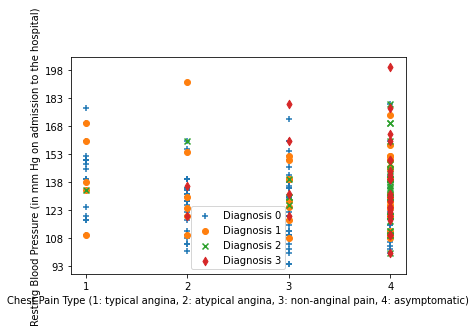

In [126]:
plt.scatter(X[diag0[:,0],2],X[diag0[:,0],3],c='#1f77b4',marker="+")
plt.scatter(X[diag1[:,0],2],X[diag1[:,0],3],c="#ff7f0e",marker="o")
plt.scatter(X[diag2[:,0],2],X[diag2[:,0],3],c="#2ca02c",marker="x")
plt.scatter(X[diag3[:,0],2],X[diag3[:,0],3],c="#d62728",marker="d")
plt.xticks(np.arange(1, 5, 1))
plt.yticks(np.arange(93, 201, 15))
plt.xlabel("Chest Pain Type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)")
plt.ylabel("Resting Blood Pressure (in mm Hg on admission to the hospital)")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

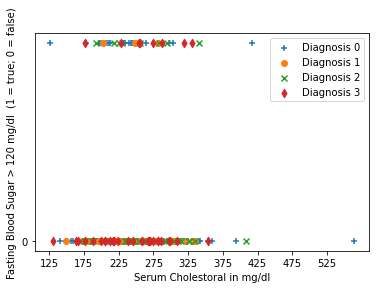

In [113]:
plt.scatter(X[diag0[:,0],4],X[diag0[:,0],5],c='#1f77b4',marker="+")
plt.scatter(X[diag1[:,0],4],X[diag1[:,0],5],c="#ff7f0e",marker="o")
plt.scatter(X[diag2[:,0],4],X[diag2[:,0],5],c="#2ca02c",marker="x")
plt.scatter(X[diag3[:,0],4],X[diag3[:,0],5],c="#d62728",marker="d")
plt.xticks(np.arange(125, 565, 50))
plt.yticks(np.arange(0, 1, 1))
plt.xlabel("Serum Cholestoral in mg/dl")
plt.ylabel("Fasting Blood Sugar > 120 mg/dl  (1 = true; 0 = false)")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

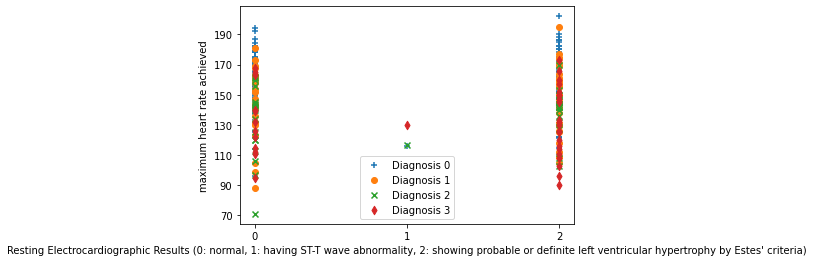

In [116]:
plt.scatter(X[diag0[:,0],6],X[diag0[:,0],7],c='#1f77b4',marker="+")
plt.scatter(X[diag1[:,0],6],X[diag1[:,0],7],c="#ff7f0e",marker="o")
plt.scatter(X[diag2[:,0],6],X[diag2[:,0],7],c="#2ca02c",marker="x")
plt.scatter(X[diag3[:,0],6],X[diag3[:,0],7],c="#d62728",marker="d")
plt.xticks(np.arange(0, 3, 1))
plt.yticks(np.arange(70, 203, 20))
plt.xlabel("Resting Electrocardiographic Results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)")
plt.ylabel("maximum heart rate achieved")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

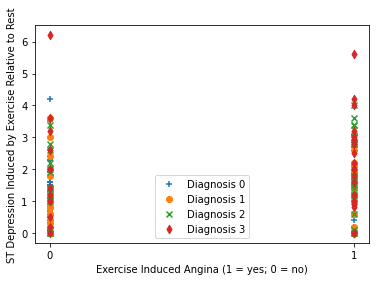

In [119]:
plt.scatter(X[diag0[:,0],8],X[diag0[:,0],9],c='#1f77b4',marker="+")
plt.scatter(X[diag1[:,0],8],X[diag1[:,0],9],c="#ff7f0e",marker="o")
plt.scatter(X[diag2[:,0],8],X[diag2[:,0],9],c="#2ca02c",marker="x")
plt.scatter(X[diag3[:,0],8],X[diag3[:,0],9],c="#d62728",marker="d")
plt.xticks(np.arange(0, 2, 1))
plt.yticks(np.arange(0, 7, 1))
plt.xlabel("Exercise Induced Angina (1 = yes; 0 = no)")
plt.ylabel("ST Depression Induced by Exercise Relative to Rest")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

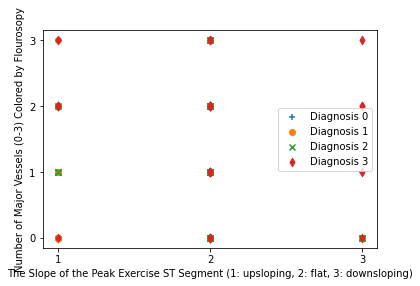

In [121]:
plt.scatter(X[diag0[:,0],10],X[diag0[:,0],11],c='#1f77b4',marker="+")
plt.scatter(X[diag1[:,0],10],X[diag1[:,0],11],c="#ff7f0e",marker="o")
plt.scatter(X[diag2[:,0],10],X[diag2[:,0],11],c="#2ca02c",marker="x")
plt.scatter(X[diag3[:,0],10],X[diag3[:,0],11],c="#d62728",marker="d")
plt.xticks(np.arange(1, 4, 1))
plt.yticks(np.arange(0, 4, 1))
plt.xlabel("The Slope of the Peak Exercise ST Segment (1: upsloping, 2: flat, 3: downsloping)")
plt.ylabel("Number of Major Vessels (0-3) Colored by Flourosopy")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

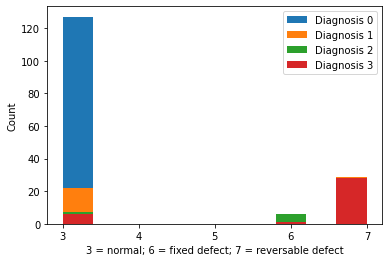

In [135]:
plt.hist(x=X[diag0[:,0],12])
plt.hist(x=X[diag1[:,0],12])
plt.hist(x=X[diag2[:,0],12])
plt.hist(x=X[diag3[:,0],12])
plt.xticks(np.arange(3, 8, 1))
plt.xlabel("3 = normal; 6 = fixed defect; 7 = reversable defect")
plt.ylabel("Count")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

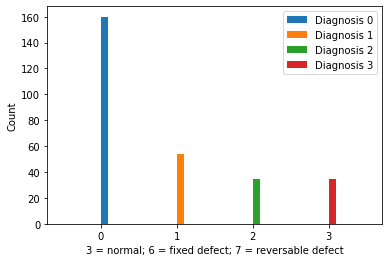

In [145]:
plt.hist(x=y[diag0[:]])
plt.hist(x=y[diag1[:]])
plt.hist(x=y[diag2[:]])
plt.hist(x=y[diag3[:]])
plt.xticks(np.arange(0, 4, 1))
plt.xlabel("3 = normal; 6 = fixed defect; 7 = reversable defect")
plt.ylabel("Count")
plt.legend(["Diagnosis 0", "Diagnosis 1", "Diagnosis 2", "Diagnosis 3"])

/home/joao/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


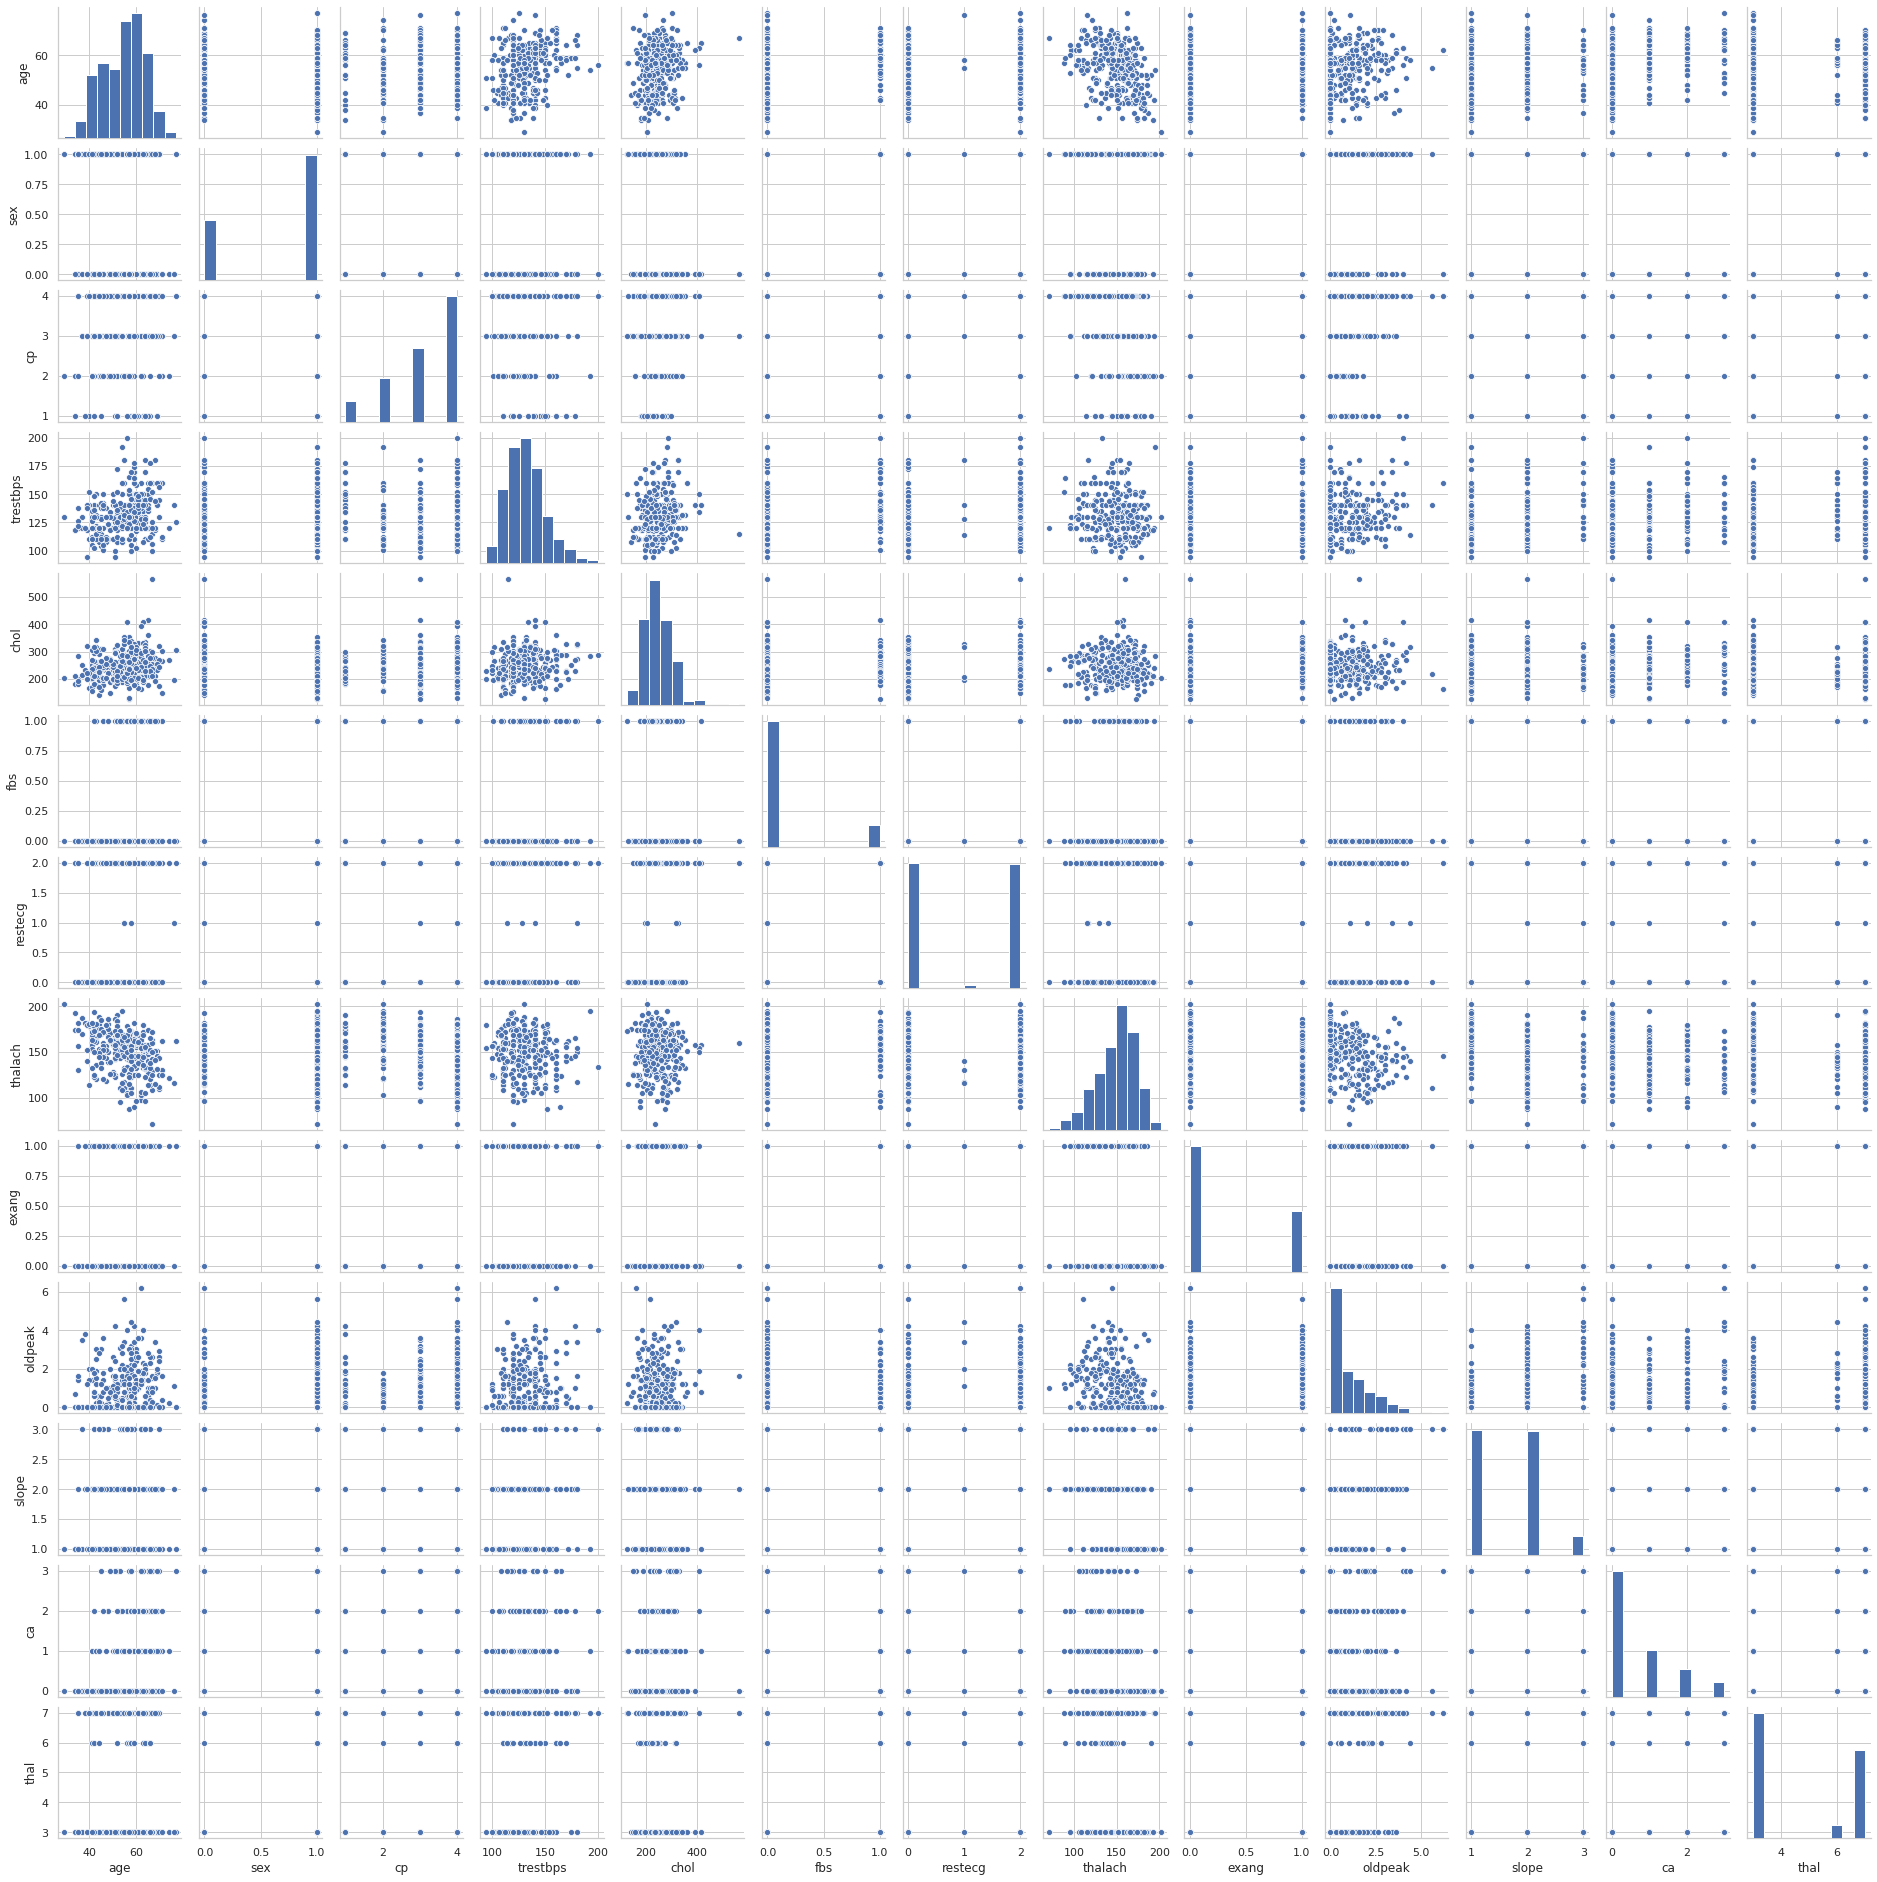

In [160]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(data[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]], size=2)
plt.show()

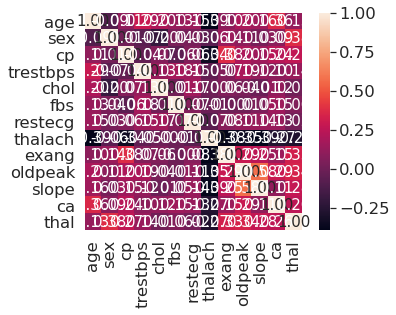

In [162]:
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
cm = np.corrcoef(data[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()